In [4]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [82]:
# Importing in Common Data Science Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Modeling & Accuracy Metrics
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [6]:
data = pd.read_csv('/content/gdrive/MyDrive/Winter Internship HRC/Assignments/Final/1830151.csv')
data.shape

(50000, 19)

In [7]:
data.columns

Index(['business_code', 'cust_number', 'name_customer', 'clear_date',
       'buisness_year', 'doc_id', 'posting_date', 'document_create_date',
       'document_create_date.1', 'due_in_date', 'invoice_currency',
       'document type', 'posting_id', 'area_business', 'total_open_amount',
       'baseline_create_date', 'cust_payment_terms', 'invoice_id', 'isOpen'],
      dtype='object')

In [8]:
data.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200780383,MEIJ,2019-07-10 00:00:00,2019.0,1.929535e+09,2019-06-24,20190624,20190624,20190709.0,USD,RV,1.0,NaN,52499.91,20190624.0,NAA8,1.929535e+09,0
1,U001,0200769623,WAL-MAR foundation,2019-01-09 00:00:00,2019.0,1.928539e+09,2018-12-30,20181229,20181230,20190114.0,USD,RV,1.0,NaN,34233.17,20181230.0,NAH4,1.928539e+09,0
2,U001,0200769623,WAL-MAR associates,2019-07-26 00:00:00,2019.0,1.929624e+09,2019-07-16,20190716,20190716,20190731.0,USD,RV,1.0,NaN,55955.58,20190716.0,NAH4,1.929624e+09,0
3,U001,0200769623,WAL-MAR systems,2019-12-09 00:00:00,2019.0,1.930184e+09,2019-11-22,20191122,20191122,20191207.0,USD,RV,1.0,NaN,6142.90,20191122.0,NAH4,1.930184e+09,0
4,U001,0200936373,SUPE us,2019-06-27 00:00:00,2019.0,1.929478e+09,2019-06-11,20190612,20190611,20190626.0,USD,RV,1.0,NaN,32792.21,20190611.0,NAA8,1.929478e+09,0


In [9]:
df=data

In [10]:
df['clear_date']=pd.to_datetime(df['clear_date'])
df['posting_date']=pd.to_datetime(df['posting_date'])
df['due_in_date']=pd.to_datetime(df['due_in_date'],format='%Y%m%d', errors='ignore')
df['document_create_date']=pd.to_datetime(df['document_create_date'],format='%Y%m%d', errors='ignore')
df['document_create_date.1']=pd.to_datetime(df['document_create_date.1'],format='%Y%m%d', errors='ignore')
df['baseline_create_date']=pd.to_datetime(df['baseline_create_date'], format='%Y%m%d', errors='ignore')
df['buisness_year']=df['buisness_year'].astype(int)

In [11]:
df.dtypes

business_code                     object
cust_number                       object
name_customer                     object
clear_date                datetime64[ns]
buisness_year                      int64
doc_id                           float64
posting_date              datetime64[ns]
document_create_date      datetime64[ns]
document_create_date.1    datetime64[ns]
due_in_date               datetime64[ns]
invoice_currency                  object
document type                     object
posting_id                       float64
area_business                    float64
total_open_amount                float64
baseline_create_date      datetime64[ns]
cust_payment_terms                object
invoice_id                       float64
isOpen                             int64
dtype: object

In [12]:
df.drop(['document_create_date'],axis=1,inplace=True)

In [13]:
data=df.sort_values(by='document_create_date.1',ignore_index=True)
data=data.rename(columns={'document_create_date.1':'document_create_date'})
data

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,CA02,0140104409,LOB us,2019-12-27,2019,9.500000e+09,2019-03-29,2018-11-26,2018-12-06,CAD,X2,1.0,NaN,420.40,2018-11-26,CA10,NaN,0
1,U001,0200752302,KROGER corporation,2019-01-14,2019,1.928537e+09,2018-12-30,2018-12-30,2019-01-14,USD,RV,1.0,NaN,48419.67,2018-12-30,NAA8,1.928537e+09,0
2,CA02,0140106408,WAL-M llc,2019-01-25,2019,2.960520e+09,2018-12-30,2018-12-30,2019-01-09,CAD,RV,1.0,NaN,59427.93,2018-12-30,CA10,2.960520e+09,0
3,U001,0200744019,TARG corp,2019-01-11,2019,1.928532e+09,2018-12-30,2018-12-30,2019-01-14,USD,RV,1.0,NaN,11309.19,2018-12-30,NAA8,1.928532e+09,0
4,U001,0200769623,WAL-MAR in,2019-01-09,2019,1.928539e+09,2018-12-30,2018-12-30,2019-01-14,USD,RV,1.0,NaN,1248.12,2018-12-30,NAH4,1.928539e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,0200765011,MAINES llc,NaT,2020,1.930904e+09,2020-05-14,2020-05-14,2020-05-29,USD,RV,1.0,NaN,16099.20,2020-05-14,NAA8,1.930904e+09,1
49996,U001,0200915438,GROC foundation,NaT,2020,1.930907e+09,2020-05-18,2020-05-18,2020-06-02,USD,RV,1.0,NaN,1232.00,2020-05-18,NAA8,1.930907e+09,1
49997,CA02,0140105785,SHOPPE us,NaT,2020,2.960636e+09,2020-05-19,2020-05-19,2020-05-29,CAD,RV,1.0,NaN,7214.76,2020-05-19,CA10,2.960636e+09,1
49998,U001,0200780383,MEIJ corporation,NaT,2020,1.930921e+09,2020-05-20,2020-05-20,2020-06-04,USD,RV,1.0,NaN,1667.74,2020-05-20,NAA8,1.930921e+09,1


In [14]:
data_train=data.loc[data['clear_date'].notna()]
data_train=data_train.reset_index(drop=True)
data_null_cleardate=data.loc[data['clear_date'].isna()]
data_null_cleardate=data_null_cleardate.reset_index(drop=True)


In [15]:
df=data_train

In [16]:
df['cust_number'].loc[df['cust_number'].str.isdigit()!=True]

18       CCU013
35       CCU013
61       CCU013
62       CC5050
114      CC7470
          ...  
45877    CCCA02
45892    CCCA02
45899    CCCA02
45905    CCCA02
45906    CCU013
Name: cust_number, Length: 1557, dtype: object

In [17]:
df['due_duration']=(df['clear_date']-df['due_in_date']).dt.days

In [18]:
df['due_duration'].value_counts().sort_index()

-89     1
-81     1
-79     1
-78     1
-76     5
       ..
 147    1
 172    1
 202    2
 277    1
 386    1
Name: due_duration, Length: 180, dtype: int64

In [19]:
(df.loc[df['document_create_date']<=df['posting_date']].loc[df['posting_date']<=df['due_in_date']].loc[df['baseline_create_date']<=df['due_in_date']].loc[df['baseline_create_date']<=df['clear_date']])['due_duration'].value_counts().sort_index()

-89     1
-81     1
-79     1
-78     1
-76     5
       ..
 144    1
 147    1
 172    1
 202    2
 277    1
Name: due_duration, Length: 179, dtype: int64

In [20]:
df=(df.loc[df['document_create_date']<=df['posting_date']].loc[df['posting_date']<=df['due_in_date']].loc[df['baseline_create_date']<=df['due_in_date']].loc[df['baseline_create_date']<=df['clear_date']])

In [21]:
df.shape#head(2)

(45821, 19)

In [22]:
for i in df.columns:
    if bool(list(df[i].isna().value_counts().index)[0]):
        print(i)  

area_business


In [23]:
for i in df.columns:
    print(i)
    print(df[i].nunique())
    if df[i].nunique()<100:
        print(df[i].value_counts())
    print()

business_code
6
U001    41442
CA02     3566
U013      674
U002      127
U005       10
U007        2
Name: business_code, dtype: int64

cust_number
1408

name_customer
4235

clear_date
400

buisness_year
2
2019    39875
2020     5946
Name: buisness_year, dtype: int64

doc_id
45821

posting_date
421

document_create_date
421

due_in_date
493

invoice_currency
2
USD    42254
CAD     3567
Name: invoice_currency, dtype: int64

document type
1
RV    45821
Name: document type, dtype: int64

posting_id
1
1.0    45821
Name: posting_id, dtype: int64

area_business
0
Series([], Name: area_business, dtype: int64)

total_open_amount
41477

baseline_create_date
430

cust_payment_terms
72
NAA8    18388
NAH4    12009
CA10     3484
NAC6     1571
NAM4     1291
        ...  
B030        1
NAUY        1
NATW        1
B112        1
NATM        1
Name: cust_payment_terms, Length: 72, dtype: int64

invoice_id
45821

isOpen
1
0    45821
Name: isOpen, dtype: int64

due_duration
179



In [24]:
df=df.drop(['posting_id','area_business','isOpen','clear_date','document type'],axis=1)

In [25]:
(df['total_open_amount']<0).value_counts()

False    45821
Name: total_open_amount, dtype: int64

In [26]:
df

,business_code,cust_number,name_customer,buisness_year,doc_id,posting_date,document_create_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,due_duration
1,U001,0200752302,KROGER corporation,2019,1.928537e+09,2018-12-30,2018-12-30,2019-01-14,USD,48419.67,2018-12-30,NAA8,1.928537e+09,0
2,CA02,0140106408,WAL-M llc,2019,2.960520e+09,2018-12-30,2018-12-30,2019-01-09,CAD,59427.93,2018-12-30,CA10,2.960520e+09,16
3,U001,0200744019,TARG corp,2019,1.928532e+09,2018-12-30,2018-12-30,2019-01-14,USD,11309.19,2018-12-30,NAA8,1.928532e+09,-3
4,U001,0200769623,WAL-MAR in,2019,1.928539e+09,2018-12-30,2018-12-30,2019-01-14,USD,1248.12,2018-12-30,NAH4,1.928539e+09,-5
5,U001,0200769623,WAL-MAR corp,2019,1.928543e+09,2018-12-30,2018-12-30,2019-01-14,USD,1763.96,2018-12-30,NAH4,1.928543e+09,-3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45954,U001,0200326954,NEWE in,2020,1.930574e+09,2020-02-26,2020-02-26,2020-03-04,USD,73652.23,2020-02-26,NAD8,1.930574e+09,2
45955,U001,0200772595,SAFEW,2020,1.930574e+09,2020-02-26,2020-02-26,2020-03-12,USD,50210.26,2020-02-26,NAA8,1.930574e+09,0
45956,CA02,0140105686,SYSC llc,2020,2.960616e+09,2020-02-26,2020-02-26,2020-03-15,CAD,3336.00,2020-03-05,CA10,2.960616e+09,4
45957,U001,0200759878,SA systems,2020,1.930574e+09,2020-02-27,2020-02-27,2020-03-13,USD,63966.18,2020-02-27,NAH4,1.930574e+09,0


In [27]:
x_train, x_test_init, y_train, y_test_init = train_test_split(
    df.drop(labels=['due_duration'], axis=1),
    df['due_duration'],
    test_size=0.3,
    shuffle=False)

In [28]:
x_train.shape, x_test_init.shape, y_train.shape, y_test_init.shape

((32074, 13), (13747, 13), (32074,), (13747,))

In [29]:
x_val, x_test = train_test_split(
    x_test_init,
    test_size=0.5,
    shuffle=False)
y_val, y_test = train_test_split(
y_test_init,
    test_size=0.5,
    shuffle=False)
x_val.shape, x_test.shape,y_val.shape, y_test.shape

((6873, 13), (6874, 13), (6873,), (6874,))

In [30]:
df=x_train.copy()

In [31]:
def encoding(df):
    df_obj=df#[['name_customer','cust_number','cust_payment_terms','business_code','invoice_currency']].copy()
    code_invoice_currency = {k: i for i, k in enumerate(df_obj.invoice_currency.unique(), 1)}
    df_obj.loc[:, 'code_invoice_currency'] = df_obj.loc[:, 'invoice_currency'].map(code_invoice_currency)

    code_business_code = {k: i for i, k in enumerate(df_obj.business_code.unique(), 1)}
    df_obj.loc[:, 'code_business_code'] = df_obj.loc[:, 'business_code'].map(code_business_code)

    code_cust_payment_terms = {k: i for i, k in enumerate(df_obj.cust_payment_terms.unique(), 1)}
    df_obj.loc[:, 'code_cust_payment_terms'] = df_obj.loc[:, 'cust_payment_terms'].map(code_cust_payment_terms)

    code_cust_number = {k: i for i, k in enumerate(df_obj.cust_number.unique(), 1)}
    df_obj.loc[:, 'code_cust_number'] = df_obj.loc[:, 'cust_number'].map(code_cust_number)

    code_name_customer = {k: i for i, k in enumerate(df_obj.name_customer.unique(), 1)}
    df_obj.loc[:, 'code_name_customer'] = df_obj.loc[:, 'name_customer'].map(code_name_customer)

    #df['name_customer'],df['cust_number'],df['cust_payment_terms'],df['business_code'],df['invoice_currency']=df_obj.loc[:, 'code_name_customer'],df_obj.loc[:, 'code_cust_number'],df_obj.loc[:, 'code_cust_payment_terms'],df_obj.loc[:, 'code_business_code'],df_obj.loc[:, 'code_invoice_currency']
    return df

In [32]:
encoding(df)

,business_code,cust_number,name_customer,buisness_year,doc_id,posting_date,document_create_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,code_invoice_currency,code_business_code,code_cust_payment_terms,code_cust_number,code_name_customer
1,U001,0200752302,KROGER corporation,2019,1.928537e+09,2018-12-30,2018-12-30,2019-01-14,USD,48419.67,2018-12-30,NAA8,1.928537e+09,1,1,1,1,1
2,CA02,0140106408,WAL-M llc,2019,2.960520e+09,2018-12-30,2018-12-30,2019-01-09,CAD,59427.93,2018-12-30,CA10,2.960520e+09,2,2,2,2,2
3,U001,0200744019,TARG corp,2019,1.928532e+09,2018-12-30,2018-12-30,2019-01-14,USD,11309.19,2018-12-30,NAA8,1.928532e+09,1,1,1,3,3
4,U001,0200769623,WAL-MAR in,2019,1.928539e+09,2018-12-30,2018-12-30,2019-01-14,USD,1248.12,2018-12-30,NAH4,1.928539e+09,1,1,3,4,4
5,U001,0200769623,WAL-MAR corp,2019,1.928543e+09,2018-12-30,2018-12-30,2019-01-14,USD,1763.96,2018-12-30,NAH4,1.928543e+09,1,1,3,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32183,U001,0200712105,WALG us,2019,1.929985e+09,2019-10-08,2019-10-08,2019-10-23,USD,62332.70,2019-10-08,NAA8,1.929985e+09,1,1,1,82,1327
32184,U001,0100031704,DELHAIZE trust,2019,1.929984e+09,2019-10-08,2019-10-08,2019-10-23,USD,19033.40,2019-10-08,NAA8,1.929984e+09,1,1,1,12,937
32185,U001,0200705742,DOT foundation,2019,1.929981e+09,2019-10-08,2019-10-08,2019-10-23,USD,8018.58,2019-10-08,NAA8,1.929981e+09,1,1,1,33,107
32186,U001,0200759878,SA systems,2019,1.929983e+09,2019-10-08,2019-10-08,2019-10-23,USD,12753.74,2019-10-08,NAH4,1.929983e+09,1,1,3,7,11


In [33]:
df.drop(['name_customer','cust_number','cust_payment_terms','business_code','invoice_currency'],axis=1,inplace=True)

In [34]:
def dates_feature(df):
    df_dates=df
    df_dates['posting_date_month'],df_dates['posting_date_day'],df_dates['posting_date_year'],df_dates['posting_date_quarter'],df_dates['posting_date_dayofweek'],df_dates['posting_date_week']=df_dates['posting_date'].dt.month,df_dates['posting_date'].dt.day,df_dates['posting_date'].dt.year,df_dates['posting_date'].dt.quarter,df_dates['posting_date'].dt.dayofweek,df_dates['posting_date'].dt.isocalendar().week.astype(int)
    df_dates['due_in_date_month'],df_dates['due_in_date_day'],df_dates['due_in_date_year'],df_dates['due_in_date_quarter'],df_dates['due_in_date_dayofweek'],df_dates['due_in_date_week']=df_dates['due_in_date'].dt.month,df_dates['due_in_date'].dt.day,df_dates['due_in_date'].dt.year,df_dates['due_in_date'].dt.quarter,df_dates['due_in_date'].dt.dayofweek,df_dates['due_in_date'].dt.isocalendar().week.astype(int)
    df_dates['document_create_date_month'],df_dates['document_create_date_day'],df_dates['document_create_date_year'],df_dates['document_create_date_quarter'],df_dates['document_create_date_dayofweek'],df_dates['document_create_date_week']=df_dates['document_create_date'].dt.month,df_dates['document_create_date'].dt.day,df_dates['document_create_date'].dt.year,df_dates['document_create_date'].dt.quarter,df_dates['document_create_date'].dt.dayofweek,df_dates['document_create_date'].dt.isocalendar().week.astype(int)
    df_dates['baseline_create_date_month'],df_dates['baseline_create_date_day'],df_dates['baseline_create_date_year'],df_dates['baseline_create_date_quarter'],df_dates['baseline_create_date_dayofweek'],df_dates['baseline_create_date_week']=df_dates['baseline_create_date'].dt.month,df_dates['baseline_create_date'].dt.day,df_dates['baseline_create_date'].dt.year,df_dates['baseline_create_date'].dt.quarter,df_dates['baseline_create_date'].dt.dayofweek,df_dates['baseline_create_date'].dt.isocalendar().week.astype(int)
    df=df_dates
    #df=df.drop(['posting_date','document_create_date','due_in_date','baseline_create_date'],axis=1)
    return None

In [35]:
dates_feature(df)

In [36]:
df=df.drop(['posting_date','document_create_date','due_in_date','baseline_create_date'],axis=1)

In [37]:
corr=df.corr().abs()

u=corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))

print([column for column in u.columns if any(u[column] ==1)])


['invoice_id', 'document_create_date_month', 'document_create_date_day', 'document_create_date_year', 'document_create_date_quarter', 'document_create_date_dayofweek', 'document_create_date_week']


In [38]:
#for i in df.columns:
    #sns.displot(df, x=i, kind="kde")

In [39]:
#for i in df.columns:
 #   print(i)
  #  print(df[i].nunique())
   # if df[i].nunique()<100:
    #    print(df[i].value_counts())
    #print()

In [40]:
#for i in df.columns:
 #   print(i)
  #  print(df[i].describe())
   # print()

In [41]:
df#.shape

,buisness_year,doc_id,total_open_amount,invoice_id,code_invoice_currency,code_business_code,code_cust_payment_terms,code_cust_number,code_name_customer,posting_date_month,posting_date_day,posting_date_year,posting_date_quarter,posting_date_dayofweek,posting_date_week,due_in_date_month,due_in_date_day,due_in_date_year,due_in_date_quarter,due_in_date_dayofweek,due_in_date_week,document_create_date_month,document_create_date_day,document_create_date_year,document_create_date_quarter,document_create_date_dayofweek,document_create_date_week,baseline_create_date_month,baseline_create_date_day,baseline_create_date_year,baseline_create_date_quarter,baseline_create_date_dayofweek,baseline_create_date_week
1,2019,1.928537e+09,48419.67,1.928537e+09,1,1,1,1,1,12,30,2018,4,6,52,1,14,2019,1,0,3,12,30,2018,4,6,52,12,30,2018,4,6,52
2,2019,2.960520e+09,59427.93,2.960520e+09,2,2,2,2,2,12,30,2018,4,6,52,1,9,2019,1,2,2,12,30,2018,4,6,52,12,30,2018,4,6,52
3,2019,1.928532e+09,11309.19,1.928532e+09,1,1,1,3,3,12,30,2018,4,6,52,1,14,2019,1,0,3,12,30,2018,4,6,52,12,30,2018,4,6,52
4,2019,1.928539e+09,1248.12,1.928539e+09,1,1,3,4,4,12,30,2018,4,6,52,1,14,2019,1,0,3,12,30,2018,4,6,52,12,30,2018,4,6,52
5,2019,1.928543e+09,1763.96,1.928543e+09,1,1,3,4,5,12,30,2018,4,6,52,1,14,2019,1,0,3,12,30,2018,4,6,52,12,30,2018,4,6,52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32183,2019,1.929985e+09,62332.70,1.929985e+09,1,1,1,82,1327,10,8,2019,4,1,41,10,23,2019,4,2,43,10,8,2019,4,1,41,10,8,2019,4,1,41
32184,2019,1.929984e+09,19033.40,1.929984e+09,1,1,1,12,937,10,8,2019,4,1,41,10,23,2019,4,2,43,10,8,2019,4,1,41,10,8,2019,4,1,41
32185,2019,1.929981e+09,8018.58,1.929981e+09,1,1,1,33,107,10,8,2019,4,1,41,10,23,2019,4,2,43,10,8,2019,4,1,41,10,8,2019,4,1,41
32186,2019,1.929983e+09,12753.74,1.929983e+09,1,1,3,7,11,10,8,2019,4,1,41,10,23,2019,4,2,43,10,8,2019,4,1,41,10,8,2019,4,1,41


In [42]:
sel = VarianceThreshold(
    threshold=0)  # 0.1 indicates 99% of observations approximately

sel.fit(df)  # fit finds the features with low variance

# get_support is a boolean vector that indicates which features 
# are retained. If we sum over get_support, we get the number
# of features that are not quasi-constant
sum(sel.get_support())

# another way of doing the above operation:
len(df.columns[sel.get_support()])

# finally we can print the quasi-constant features
print(
    len([
        x for x in df.columns
        if x not in df.columns[sel.get_support()]
    ]))

[x for x in df.columns if x not in df.columns[sel.get_support()]]

1


['buisness_year']

In [43]:
sel = VarianceThreshold(
    threshold=0.2)  # 0.1 indicates 99% of observations approximately

sel.fit(df)  # fit finds the features with low variance

# get_support is a boolean vector that indicates which features 
# are retained. If we sum over get_support, we get the number
# of features that are not quasi-constant
sum(sel.get_support())

# another way of doing the above operation:
len(df.columns[sel.get_support()])

# finally we can print the quasi-constant features
print(
    len([
        x for x in df.columns
        if x not in df.columns[sel.get_support()]
    ]))

[x for x in df.columns if x not in df.columns[sel.get_support()]]

7


['buisness_year',
 'code_invoice_currency',
 'code_business_code',
 'posting_date_year',
 'due_in_date_year',
 'document_create_date_year',
 'baseline_create_date_year']

In [44]:
df=df.drop(['buisness_year',
 'code_invoice_currency',
 'code_business_code',
 'posting_date_year',
 'due_in_date_year',
 'document_create_date_year',
 'baseline_create_date_year'],axis=1)

In [45]:
df.columns

Index(['doc_id', 'total_open_amount', 'invoice_id', 'code_cust_payment_terms',
       'code_cust_number', 'code_name_customer', 'posting_date_month',
       'posting_date_day', 'posting_date_quarter', 'posting_date_dayofweek',
       'posting_date_week', 'due_in_date_month', 'due_in_date_day',
       'due_in_date_quarter', 'due_in_date_dayofweek', 'due_in_date_week',
       'document_create_date_month', 'document_create_date_day',
       'document_create_date_quarter', 'document_create_date_dayofweek',
       'document_create_date_week', 'baseline_create_date_month',
       'baseline_create_date_day', 'baseline_create_date_quarter',
       'baseline_create_date_dayofweek', 'baseline_create_date_week'],
      dtype='object')

In [46]:
df=df.drop(['doc_id', 'invoice_id'],axis=1)

In [48]:
df.columns

Index(['total_open_amount', 'code_cust_payment_terms', 'code_cust_number',
       'code_name_customer', 'posting_date_month', 'posting_date_day',
       'posting_date_quarter', 'posting_date_dayofweek', 'posting_date_week',
       'due_in_date_month', 'due_in_date_day', 'due_in_date_quarter',
       'due_in_date_dayofweek', 'due_in_date_week',
       'document_create_date_month', 'document_create_date_day',
       'document_create_date_quarter', 'document_create_date_dayofweek',
       'document_create_date_week', 'baseline_create_date_month',
       'baseline_create_date_day', 'baseline_create_date_quarter',
       'baseline_create_date_dayofweek', 'baseline_create_date_week'],
      dtype='object')

In [54]:
a=df.drop(['posting_date_month', 'posting_date_day',
       'posting_date_quarter', 'posting_date_dayofweek', 'posting_date_week',
       'baseline_create_date_day', 'baseline_create_date_quarter', 'due_in_date_week',
       'baseline_create_date_dayofweek','document_create_date_week','due_in_date_dayofweek','baseline_create_date_month', 'baseline_create_date_week'],axis=1)

In [55]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [56]:
a.columns

Index(['total_open_amount', 'code_cust_payment_terms', 'code_cust_number',
       'code_name_customer', 'due_in_date_month', 'due_in_date_day',
       'due_in_date_quarter', 'document_create_date_month',
       'document_create_date_day', 'document_create_date_quarter',
       'document_create_date_dayofweek'],
      dtype='object')

In [ ]:
scaler.fit(a)
scaler.transform(a)

array([[ 0.41220068, -0.51184984, -0.64194715, ...,  1.85255319,
         2.7208974 ,  2.56261366],
       [ 0.68589895, -0.40118986, -0.63753827, ...,  1.85255319,
         2.7208974 ,  2.56261366],
       [-0.51047686, -0.51184984, -0.6331294 , ...,  1.85255319,
         2.7208974 ,  2.56261366],
       ...,
       [-0.59229127, -0.51184984, -0.50086311, ..., -0.91337571,
         1.75744769,  1.80611784],
       [-0.47456103, -0.29052988, -0.61549389, ..., -0.91337571,
         1.75744769,  1.80611784],
       [-0.44298901, -0.06920993,  0.05465527, ..., -0.91337571,
         1.75744769,  1.80611784]])

In [ ]:
#a=df

In [57]:
# Defining Lists to Store in the Results and Names of Algorithms
MSE_Score = []
R2_Score = []
true_false = []
Algorithm = []

In [73]:
X_train=a.reset_index(drop=True)
X_test=q.reset_index(drop=True)
y_test=y_val.reset_index(drop=True)
ooo=y_train.copy()

In [74]:
y_train=ooo.copy().reset_index(drop=True)

In [75]:
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import IsolationForest
from sklearn.covariance import EllipticEnvelope
#from sklearn.metrics import mean_absolute_percentage_error

### **1. Linear Regression**

In [76]:
X_train.shape,y_train.shape

((32074, 11), (32074,))

In [ ]:
iso = IsolationForest(contamination=0.1)
yhat = iso.fit_predict(X_train)

In [ ]:
iso = IsolationForest(contamination=0.1)
yhat = iso.fit_predict(y_train.to_frame())

In [ ]:
ee = EllipticEnvelope(contamination=0.01)
yhat = ee.fit_predict(y_train.to_frame())

In [ ]:
ee = EllipticEnvelope(contamination=0.01)
yhat = ee.fit_predict(X_train)

/usr/local/lib/python3.6/dist-packages/sklearn/covariance/_robust_covariance.py:170: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-6.211877083050219 > -52.612478631295318). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/covariance/_robust_covariance.py:170: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-54.720150646410517 > -80.184020587288103). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/covariance/_robust_covariance.py:170: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-6.709446941249471 > -53.281469902952857). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
/usr/local/lib/pyt

In [ ]:
mask = yhat != -1
X_train, y_train = X_train.loc[mask, :], y_train.loc[mask]

In [ ]:
yhat.shape

(29282,)

In [ ]:
# Fitting Simple Linear Regression to the Training Set
Algorithm.append('Linear Regression')
clf = LinearRegression()
clf.fit(X_train, y_train)

# Predicting the Test Set Results
predicted = clf.predict(X_test)

In [ ]:
# Appending the Scores For Visualisation at a Later Part
print(mean_squared_error(y_test, predicted))
print(r2_score(y_test, predicted))
print(abs((pd.Series(np.around(predicted)).astype(int)-y_test.reset_index(drop=True))<3).value_counts())
mean_absolute_error(y_test, predicted)

49.431085475654534
0.010398187237655288
True     4684
False    2189
dtype: int64


3.953652892934249

### **2. Support Vector Regression**

In [ ]:
# Fitting SVR to the Training Set
Algorithm.append('Support Vector Regression')
clf = SVR()
clf.fit(X_train, y_train)

# Predicting the Test Set Results
predicted = clf.predict(X_test)

In [ ]:
# Appending the Scores For Visualisation at a Later Part
print(mean_squared_error(y_test, predicted))
print(r2_score(y_test, predicted))
print(abs((pd.Series(np.around(predicted)).astype(int)-y_test.reset_index(drop=True))<3).value_counts())
mean_absolute_error(y_test, predicted)

49.77767090186462
0.0034596067320049606
True     4998
False    1875
dtype: int64


3.763305896842025

### **3. Decision Tree Regressor**

In [ ]:
# Fitting Decision Tree to the Training Set
Algorithm.append('Decision Tree Regressor')
clf = DecisionTreeRegressor(max_depth=30)#,max_features='auto')
clf.fit(X_train, y_train)
predicted = clf.predict(X_train)
print((pd.Series(np.around(predicted)).astype(int)==y_train.reset_index(drop=True)).value_counts())
print(mean_absolute_error(y_train, predicted))
# Predicting the Test Set Results
predicted = clf.predict(X_test)

True     30139
False     1935
dtype: int64
0.12167609079408595


In [ ]:
# Appending the Scores For Visualisation at a Later Part
print(mean_squared_error(y_test, predicted))
print(r2_score(y_test, predicted))
print(abs((pd.Series(np.around(predicted)).astype(int)-y_test.reset_index(drop=True))<3).value_counts())
mean_absolute_error(y_test, predicted)

182.87289765734516
-2.6610838966087913
True     5291
False    1582
dtype: int64


5.188405602881012

### **4. Random Forest Regressor**

In [79]:
# Fitting Random Forest Regressor Tree to the Training Set
#Algorithm.append('Random Forest Regressor')
clf = RandomForestRegressor()
qwerty=clf.fit(X_train, y_train)

# Predicting the Test Set Results
predicted = clf.predict(X_test)

In [80]:
print(qwerty.score(X_test, y_test))

qwerty.score(X_train, y_train)

0.2818383468063306


0.921026845951933

In [78]:
# Appending the Scores For Visualisation at a Later Part
print(mean_squared_error(y_test, predicted))
print(r2_score(y_test, predicted))
print((abs((pd.Series(np.around(predicted)).astype(int)-y_test.reset_index(drop=True)))<4).value_counts())
print(mean_absolute_error(y_test, predicted))
#def mean_absolute_percentage_error(y_true, y_pred): 
 #   y_true, y_pred = np.array(y_true), np.array(y_pred)
  #  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
#mean_absolute_percentage_error(y_test, predicted)
#pd.DataFrame(np.around(predicted)).value_counts()

44.918047869952744
0.10074842237191595
True     4723
False    2150
dtype: int64
3.7296521816447616


### **5. XGB Regressor**

In [ ]:
# Fitting XGBoost Regressor to the Training Set
Algorithm.append('XGB Regressor')
clf = xgb.XGBRegressor()
clf.fit(X_train, y_train)

# Predicting the Test Set Results
predicted = clf.predict(X_test)
print((pd.Series(np.around(predicted)).astype(int)==y_test.reset_index(drop=True)).value_counts())
mean_absolute_error(y_test, predicted)

[07:48:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
False    6243
True      630
dtype: int64


5.26538634097734

In [ ]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [ ]:

# Appending the Scores For Visualisation at a Later Part
print(mean_squared_error(y_test, predicted))
print(r2_score(y_test, predicted))
print((abs((pd.Series(np.around(predicted)).astype(int)-y_test.reset_index(drop=True)))>5).value_counts())
mean_absolute_error(y_test, predicted)
#op=abs((pd.Series(np.around(predicted)).astype(int)-y_test.reset_index(drop=True)))>5
#print(pd.merge(abs(y_test[op].to_frame().reset_index(drop=True).reset_index()),abs(pd.DataFrame(predicted[op]).reset_index(drop=True).reset_index()), how="left").head(100))

58.00047399607377
-0.16115949417818887
False    4407
True     2466
dtype: int64


5.26538634097734

In [ ]:
# Fitting Logistic Regression to the Training Set
classifier = LogisticRegression()
classifier.fit(x_train, y_train)

LogisticRegression()

In [ ]:
# Predicting the Test Set Results
y_pred = classifier.predict(x_test)
y_pred[:10]

array([0, 0, 0, 1, 1, 0, 1, 1, 1, 1], dtype=int64)

__Checking Accuracies__

In [ ]:
# Confusion Matrix
confusion_matrix(y_test, y_pred)

array([[118,  21],
       [ 26,  58]], dtype=int64)

In [ ]:
# Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.85      0.83       139
           1       0.73      0.69      0.71        84

    accuracy                           0.79       223
   macro avg       0.78      0.77      0.77       223
weighted avg       0.79      0.79      0.79       223



## <b> 2. Kernel - SVM Classifier

In [ ]:
# Fitting Kernel SVM to the Training Set
classifier = SVC(kernel = 'rbf')
classifier.fit(x_train, y_train)

SVC()

In [ ]:
# Predicting the Test Set Results
y_pred = classifier.predict(x_test)
y_pred[:10]

array([0, 0, 0, 1, 0, 0, 1, 1, 1, 0], dtype=int64)

__Checking Accuracies__

In [ ]:
# Confusion Matrix
confusion_matrix(y_test, y_pred)

array([[133,   6],
       [ 56,  28]], dtype=int64)

In [ ]:
# Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.96      0.81       139
           1       0.82      0.33      0.47        84

    accuracy                           0.72       223
   macro avg       0.76      0.65      0.64       223
weighted avg       0.75      0.72      0.68       223



## **3. Linear - SVM  Classifier**

In [ ]:
# Fitting Kernel SVM to the Training Set
classifier = SVC(kernel = 'linear')
classifier.fit(x_train, y_train)

SVC(kernel='linear')

In [ ]:
# Predicting the Test Set Results
y_pred = classifier.predict(x_test)

__Checking Accuracies__

In [ ]:
# Confusion Matrix
confusion_matrix(y_test, y_pred)

array([[116,  23],
       [ 25,  59]], dtype=int64)

In [ ]:
# Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.83      0.83       139
           1       0.72      0.70      0.71        84

    accuracy                           0.78       223
   macro avg       0.77      0.77      0.77       223
weighted avg       0.78      0.78      0.78       223



## **4. K-NN Classifier**

In [85]:
# Fitting KNN to the Training Set
classifier = KNeighborsClassifier()
qwerty=classifier.fit(X_train, y_train)
print(qwerty.score(X_test, y_test))

qwerty.score(X_train, y_train)

0.19540229885057472


0.39636465673130883

In [ ]:
# Predicting the Validation Set Results
y_pred = classifier.predict(x_test)
y_pred[:10]

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 0], dtype=int64)

__Checking Accuracies__

In [ ]:
# Confusion Matrix
confusion_matrix(y_test, y_pred)

array([[114,  25],
       [ 37,  47]], dtype=int64)

In [ ]:
# Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.82      0.79       139
           1       0.65      0.56      0.60        84

    accuracy                           0.72       223
   macro avg       0.70      0.69      0.69       223
weighted avg       0.72      0.72      0.72       223



## **5. Decision Tree  Classifier**

In [ ]:
# Fitting Decision Tree Classifier to the Training Set
classifier = DecisionTreeClassifier()
classifier.fit(x_train, y_train)

DecisionTreeClassifier()

In [ ]:
# Predicting the Test Set Results
y_pred = classifier.predict(x_test)
y_pred[:10]

array([0, 0, 0, 1, 0, 0, 1, 1, 1, 0], dtype=int64)

__Checking Accuracies__

In [ ]:
# Confusion Matrix
confusion_matrix(y_test, y_pred)

array([[115,  24],
       [ 29,  55]], dtype=int64)

In [ ]:
# Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.83      0.81       139
           1       0.70      0.65      0.67        84

    accuracy                           0.76       223
   macro avg       0.75      0.74      0.74       223
weighted avg       0.76      0.76      0.76       223



## __6. Random Forest  Classifier__

In [83]:
classifier = RandomForestClassifier()
qwerty=classifier.fit(X_train, y_train)
print(qwerty.score(X_test, y_test))

qwerty.score(X_train, y_train)

0.4123381347301033


0.9997817546922741

In [ ]:
# Predicting the Test Set Results
y_pred = classifier.predict(x_test)
y_pred[:10]

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

__Checking Accuracies__

In [ ]:
# Confusion Matrix
confusion_matrix(y_test, y_pred)

array([[126,  13],
       [ 22,  62]], dtype=int64)

In [ ]:
# Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88       139
           1       0.83      0.74      0.78        84

    accuracy                           0.84       223
   macro avg       0.84      0.82      0.83       223
weighted avg       0.84      0.84      0.84       223



## **7. XGBoost Classifier**

In [84]:
classifier = XGBClassifier()
qwerty=classifier.fit(X_train, y_train)
print(qwerty.score(X_test, y_test))

qwerty.score(X_train, y_train)

0.4396915466317474


0.5132817858701753

In [ ]:
# Predicting the Test Set Results
y_pred = classifier.predict(x_test)

## Score Card of the Models' Performances

In [ ]:
# Just Combining the Lists into a DataFrame for a Better Visualisation
Comparison = pd.DataFrame(list(zip(Algorithm, MSE_Score, R2_Score)), columns = ['Algorithm', 'MSE_Score', 'R2_Score'])

In [ ]:
# Score Card
Comparison

,Algorithm,MSE_Score,R2_Score
0,Linear Regression,49.431085,0.010398
1,Linear Regression,49.777671,0.003460
2,Support Vector Regression,153.929871,-2.081649
3,Decision Tree Regressor,40.574672,0.187702
4,Random Forest Regressor,58.000474,-0.161159
5,XGB Regressor,49.431085,0.010398
6,Linear Regression,49.431085,0.010398
7,Support Vector Regression,49.777671,0.003460
8,Linear Regression,181.943256,-2.642473
9,Support Vector Regression,42.835803,0.142435


In [ ]:
MSE_Score = []
R2_Score = []
Algorithm = []

clf = RandomForestRegressor()
clf.fit(a, y_train)

# Predicting the Test Set Results
#predicted = clf1.predict(df)


predicted = clf.predict(a)

#mean_squared_error(y_train, predicted)

#r2_score(y_train, predicted)

In [ ]:
#clf = DecisionTreeRegressor(max_depth=35)
clf1 = DecisionTreeRegressor(max_depth=25)
#clf.fit(a, y_train)
clf1.fit(a, y_train)
# Predicting the Test Set Results
#predicted = clf.predict(a)
predicted1 = clf1.predict(a)

In [ ]:
print(mean_squared_error(y_train, predicted))

print(r2_score(y_train, predicted))

def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape
print(MAPE(y_train,np.around(predicted)))

print((pd.Series(np.around(predicted)).astype(int)==y_train.reset_index(drop=True)).value_counts())

9.883285109622287
0.9229122099366298
inf
True     16574
False    15500
dtype: int64


In [ ]:
print(mean_squared_error(y_train, predicted1))

print(r2_score(y_train, predicted1))

def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape
print(MAPE(y_train,np.around(predicted1)))

print((pd.Series(np.around(predicted1)).astype(int)==y_train.reset_index(drop=True)).value_counts())

2.073220838622777
0.9838292621339885
inf
True     26830
False     5244
dtype: int64


In [58]:
df1=x_train.copy()
q=x_val.copy()

In [59]:
def encoding(df,a):
    df_obj=df#[['name_customer','cust_number','cust_payment_terms','business_code','invoice_currency']].copy()
    code_invoice_currency = {k: i for i, k in enumerate(a.invoice_currency.unique(), 1)}
    df_obj.loc[:, 'code_invoice_currency'] = df_obj.loc[:, 'invoice_currency'].map(code_invoice_currency)

    code_business_code = {k: i for i, k in enumerate(a.business_code.unique(), 1)}
    df_obj.loc[:, 'code_business_code'] = df_obj.loc[:, 'business_code'].map(code_business_code)

    code_cust_payment_terms = {k: i for i, k in enumerate(a.cust_payment_terms.unique(), 1)}
    df_obj.loc[:, 'code_cust_payment_terms'] = df_obj.loc[:, 'cust_payment_terms'].map(code_cust_payment_terms)

    code_cust_number = {k: i for i, k in enumerate(a.cust_number.unique(), 1)}
    df_obj.loc[:, 'code_cust_number'] = df_obj.loc[:, 'cust_number'].map(code_cust_number)

    code_name_customer = {k: i for i, k in enumerate(a.name_customer.unique(), 1)}
    df_obj.loc[:, 'code_name_customer'] = df_obj.loc[:, 'name_customer'].map(code_name_customer)

    #df['name_customer'],df['cust_number'],df['cust_payment_terms'],df['business_code'],df['invoice_currency']=df_obj.loc[:, 'code_name_customer'],df_obj.loc[:, 'code_cust_number'],df_obj.loc[:, 'code_cust_payment_terms'],df_obj.loc[:, 'code_business_code'],df_obj.loc[:, 'code_invoice_currency']
    return None

In [60]:
encoding(q,df1)

In [61]:
q.drop(['name_customer','cust_number','cust_payment_terms','business_code','invoice_currency'],axis=1,inplace=True)

In [62]:
dates_feature(q)

In [63]:
q=q.drop(['posting_date','document_create_date','due_in_date','baseline_create_date'],axis=1)

In [64]:
q=q.drop(['buisness_year',
 'code_invoice_currency',
 'code_business_code',
 'posting_date_year',
 'due_in_date_year',
 'document_create_date_year',
 'baseline_create_date_year'],axis=1)

In [65]:
q.drop(['doc_id','invoice_id'],axis=1,inplace=True)

In [66]:
q=q.drop(['posting_date_month', 'posting_date_day',
       'posting_date_quarter', 'posting_date_dayofweek', 'posting_date_week',
       'baseline_create_date_day', 'baseline_create_date_quarter', 'due_in_date_week',
       'baseline_create_date_dayofweek','document_create_date_week','due_in_date_dayofweek','baseline_create_date_month', 'baseline_create_date_week'],axis=1)

In [67]:
q['code_cust_payment_terms'].fillna(1,inplace=True)
q['code_cust_number'].fillna(4,inplace=True)
q['code_name_customer'].fillna(9,inplace=True)

In [ ]:
scaler.transform(q)

array([[-0.7026009 , -0.40118986,  0.38972986, ..., -0.91337571,
         1.75744769,  1.80611784],
       [ 0.13371504, -0.51184984, -0.52290749, ..., -0.91337571,
         1.75744769,  1.80611784],
       [-0.62012688, -0.29052988, -0.62872052, ..., -0.91337571,
         1.75744769,  1.80611784],
       ...,
       [-0.18325031, -0.29052988, -0.62872052, ..., -1.46656149,
         2.54572473,  2.56261366],
       [ 0.65080807, -0.29052988, -0.61549389, ..., -1.46656149,
         2.54572473,  2.56261366],
       [-0.45309681,  0.70540992, -0.43472997, ..., -1.46656149,
         2.54572473,  2.56261366]])

In [ ]:
for i in df.columns:
    print(i)
    print(df[i].mode())

total_open_amount
0    1897.5
dtype: float64
code_cust_payment_terms
0    1
dtype: int64
code_cust_number
0    4
dtype: int64
code_name_customer
0    9
dtype: int64
posting_date_month
0    3
dtype: int64
posting_date_day
0    5
dtype: int64
posting_date_quarter
0    2
dtype: int64
posting_date_dayofweek
0    2
dtype: int64
posting_date_week
0    14
dtype: int64
due_in_date_month
0    5
dtype: int64
due_in_date_day
0    24
dtype: int64
due_in_date_quarter
0    2
dtype: int64
due_in_date_dayofweek
0    3
dtype: int64
due_in_date_week
0    17
dtype: int64
document_create_date_month
0    3
dtype: int64
document_create_date_day
0    5
dtype: int64
document_create_date_quarter
0    2
dtype: int64
document_create_date_dayofweek
0    2
dtype: int64
document_create_date_week
0    14
dtype: int64
baseline_create_date_month
0    3
dtype: int64
baseline_create_date_day
0    1
dtype: int64
baseline_create_date_quarter
0    2
dtype: int64
baseline_create_date_dayofweek
0    2
dtype: int64
baseline_c

In [ ]:
q.columns

Index(['total_open_amount', 'code_cust_payment_terms', 'code_cust_number',
       'code_name_customer', 'due_in_date_month', 'due_in_date_day',
       'due_in_date_quarter', 'due_in_date_dayofweek', 'due_in_date_week',
       'document_create_date_month', 'document_create_date_day',
       'document_create_date_quarter', 'document_create_date_dayofweek',
       'document_create_date_week', 'baseline_create_date_month'],
      dtype='object')

In [ ]:
q['code_cust_payment_terms'].fillna(1,inplace=True)
q['code_cust_number'].fillna(4,inplace=True)
q['code_name_customer'].fillna(9,inplace=True)

In [ ]:
for i in q.columns:
    print(i)
    print(q[i].isna().value_counts())

total_open_amount
False    6873
Name: total_open_amount, dtype: int64
code_cust_payment_terms
False    6873
Name: code_cust_payment_terms, dtype: int64
code_cust_number
False    6873
Name: code_cust_number, dtype: int64
code_name_customer
False    6873
Name: code_name_customer, dtype: int64
due_in_date_month
False    6873
Name: due_in_date_month, dtype: int64
due_in_date_day
False    6873
Name: due_in_date_day, dtype: int64
due_in_date_quarter
False    6873
Name: due_in_date_quarter, dtype: int64
due_in_date_dayofweek
False    6873
Name: due_in_date_dayofweek, dtype: int64
due_in_date_week
False    6873
Name: due_in_date_week, dtype: int64
document_create_date_month
False    6873
Name: document_create_date_month, dtype: int64
document_create_date_day
False    6873
Name: document_create_date_day, dtype: int64
document_create_date_quarter
False    6873
Name: document_create_date_quarter, dtype: int64
document_create_date_dayofweek
False    6873
Name: document_create_date_dayofweek, dtype

In [ ]:
q.columns

Index(['total_open_amount', 'code_cust_payment_terms', 'code_cust_number',
       'code_name_customer', 'due_in_date_month', 'due_in_date_day',
       'due_in_date_quarter', 'due_in_date_dayofweek', 'due_in_date_week',
       'document_create_date_month', 'document_create_date_day',
       'document_create_date_quarter', 'document_create_date_dayofweek',
       'document_create_date_week', 'baseline_create_date_month'],
      dtype='object')

In [ ]:
predicted = clf1.predict(q)

NameError: ignored

In [ ]:
mean_squared_error(y_val, predicted)


NameError: ignored

In [ ]:

r2_score(y_val, predicted)


0.010398187237655288

In [ ]:

def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape
MAPE(y_val,np.around(predicted))


inf

In [ ]:

(pd.Series(np.around(predicted)).astype(int)==y_val.reset_index(drop=True)).value_counts()

False    4987
True     1886
dtype: int64

In [ ]:
y_train.reset_index(drop=True)

0         0
1        16
2        -3
3        -5
4        -3
         ..
32069     1
32070     1
32071     0
32072     1
32073    -6
Name: due_duration, Length: 32074, dtype: int64

,business_code,cust_number,name_customer,buisness_year,doc_id,posting_date,document_create_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id
1,U001,0200752302,KROGER corporation,2019,1.928537e+09,2018-12-30,2018-12-30,2019-01-14,USD,48419.67,2018-12-30,NAA8,1.928537e+09
2,CA02,0140106408,WAL-M llc,2019,2.960520e+09,2018-12-30,2018-12-30,2019-01-09,CAD,59427.93,2018-12-30,CA10,2.960520e+09
3,U001,0200744019,TARG corp,2019,1.928532e+09,2018-12-30,2018-12-30,2019-01-14,USD,11309.19,2018-12-30,NAA8,1.928532e+09
4,U001,0200769623,WAL-MAR in,2019,1.928539e+09,2018-12-30,2018-12-30,2019-01-14,USD,1248.12,2018-12-30,NAH4,1.928539e+09
5,U001,0200769623,WAL-MAR corp,2019,1.928543e+09,2018-12-30,2018-12-30,2019-01-14,USD,1763.96,2018-12-30,NAH4,1.928543e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32183,U001,0200712105,WALG us,2019,1.929985e+09,2019-10-08,2019-10-08,2019-10-23,USD,62332.70,2019-10-08,NAA8,1.929985e+09
32184,U001,0100031704,DELHAIZE trust,2019,1.929984e+09,2019-10-08,2019-10-08,2019-10-23,USD,19033.40,2019-10-08,NAA8,1.929984e+09
32185,U001,0200705742,DOT foundation,2019,1.929981e+09,2019-10-08,2019-10-08,2019-10-23,USD,8018.58,2019-10-08,NAA8,1.929981e+09
32186,U001,0200759878,SA systems,2019,1.929983e+09,2019-10-08,2019-10-08,2019-10-23,USD,12753.74,2019-10-08,NAH4,1.929983e+09


EDA

In [ ]:
df=x_train.copy()

In [ ]:
u = df.apply(pd.Series.nunique)
cd = u[u == 1].index
df.drop(cd, axis=1,inplace=True)  

In [ ]:
df

,business_code,cust_number,name_customer,doc_id,posting_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id
1,U001,0200752302,KROGER corporation,1.928537e+09,2018-12-30,2019-01-14,USD,48419.67,2018-12-30,NAA8,1.928537e+09
2,CA02,0140106408,WAL-M llc,2.960520e+09,2018-12-30,2019-01-09,CAD,59427.93,2018-12-30,CA10,2.960520e+09
3,U001,0200744019,TARG corp,1.928532e+09,2018-12-30,2019-01-14,USD,11309.19,2018-12-30,NAA8,1.928532e+09
4,U001,0200769623,WAL-MAR in,1.928539e+09,2018-12-30,2019-01-14,USD,1248.12,2018-12-30,NAH4,1.928539e+09
5,U001,0200769623,WAL-MAR corp,1.928543e+09,2018-12-30,2019-01-14,USD,1763.96,2018-12-30,NAH4,1.928543e+09
...,...,...,...,...,...,...,...,...,...,...,...
32183,U001,0200712105,WALG us,1.929985e+09,2019-10-08,2019-10-23,USD,62332.70,2019-10-08,NAA8,1.929985e+09
32184,U001,0100031704,DELHAIZE trust,1.929984e+09,2019-10-08,2019-10-23,USD,19033.40,2019-10-08,NAA8,1.929984e+09
32185,U001,0200705742,DOT foundation,1.929981e+09,2019-10-08,2019-10-23,USD,8018.58,2019-10-08,NAA8,1.929981e+09
32186,U001,0200759878,SA systems,1.929983e+09,2019-10-08,2019-10-23,USD,12753.74,2019-10-08,NAH4,1.929983e+09


In [ ]:
for i in df.columns:
    print(i)
    print(df[i].nunique())
    if df[i].nunique()<100:
        print(df[i].value_counts())
    print()

business_code
6
U001    28918
CA02     2548
U013      496
U002      104
U005        6
U007        2
Name: business_code, dtype: int64

cust_number
1301

name_customer
3684

doc_id
32074

posting_date
283

due_in_date
342

invoice_currency
2
USD    29526
CAD     2548
Name: invoice_currency, dtype: int64

total_open_amount
29192

baseline_create_date
290

cust_payment_terms
65
NAA8    12766
NAH4     8247
CA10     2484
NAC6     1097
NAM4      887
        ...  
C129        1
B112        1
NAVC        1
NATM        1
BR12        1
Name: cust_payment_terms, Length: 65, dtype: int64

invoice_id
32074



document id , invoice id not required

In [ ]:
df_obj=df.select_dtypes(include=['object']).copy()

In [ ]:
df_obj

,business_code,cust_number,name_customer,invoice_currency,cust_payment_terms
1,U001,0200752302,KROGER corporation,USD,NAA8
2,CA02,0140106408,WAL-M llc,CAD,CA10
3,U001,0200744019,TARG corp,USD,NAA8
4,U001,0200769623,WAL-MAR in,USD,NAH4
5,U001,0200769623,WAL-MAR corp,USD,NAH4
...,...,...,...,...,...
32183,U001,0200712105,WALG us,USD,NAA8
32184,U001,0100031704,DELHAIZE trust,USD,NAA8
32185,U001,0200705742,DOT foundation,USD,NAA8
32186,U001,0200759878,SA systems,USD,NAH4


In [ ]:
code_invoice_currency = {k: i for i, k in enumerate(df_obj.invoice_currency.unique(), 1)}
df_obj.loc[:, 'code_invoice_currency'] = df_obj.loc[:, 'invoice_currency'].map(code_invoice_currency)

code_business_code = {k: i for i, k in enumerate(df_obj.business_code.unique(), 1)}
df_obj.loc[:, 'code_business_code'] = df_obj.loc[:, 'business_code'].map(code_business_code)

code_cust_payment_terms = {k: i for i, k in enumerate(df_obj.cust_payment_terms.unique(), 1)}
df_obj.loc[:, 'code_cust_payment_terms'] = df_obj.loc[:, 'cust_payment_terms'].map(code_cust_payment_terms)

code_cust_number = {k: i for i, k in enumerate(df_obj.cust_number.unique(), 1)}
df_obj.loc[:, 'code_cust_number'] = df_obj.loc[:, 'cust_number'].map(code_cust_number)

code_name_customer = {k: i for i, k in enumerate(df_obj.name_customer.unique(), 1)}
df_obj.loc[:, 'code_name_customer'] = df_obj.loc[:, 'name_customer'].map(code_name_customer)

df['name_customer'],df['cust_number'],df['cust_payment_terms'],df['business_code'],df['invoice_currency']=df_obj.loc[:, 'code_name_customer'],df_obj.loc[:, 'code_cust_number'],df_obj.loc[:, 'code_cust_payment_terms'],df_obj.loc[:, 'code_business_code'],df_obj.loc[:, 'code_invoice_currency']

In [ ]:
df

,business_code,cust_number,name_customer,doc_id,posting_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id
1,1,1,1,1.928537e+09,2018-12-30,2018-12-30,2019-01-14,1,48419.67,2018-12-30,1,1.928537e+09
2,2,2,2,2.960520e+09,2018-12-30,2018-12-30,2019-01-09,2,59427.93,2018-12-30,2,2.960520e+09
3,1,3,3,1.928532e+09,2018-12-30,2018-12-30,2019-01-14,1,11309.19,2018-12-30,1,1.928532e+09
4,1,4,4,1.928539e+09,2018-12-30,2018-12-30,2019-01-14,1,1248.12,2018-12-30,3,1.928539e+09
5,1,4,5,1.928543e+09,2018-12-30,2018-12-30,2019-01-14,1,1763.96,2018-12-30,3,1.928543e+09
...,...,...,...,...,...,...,...,...,...,...,...,...
32183,1,82,1327,1.929985e+09,2019-10-08,2019-10-08,2019-10-23,1,62332.70,2019-10-08,1,1.929985e+09
32184,1,12,937,1.929984e+09,2019-10-08,2019-10-08,2019-10-23,1,19033.40,2019-10-08,1,1.929984e+09
32185,1,33,107,1.929981e+09,2019-10-08,2019-10-08,2019-10-23,1,8018.58,2019-10-08,1,1.929981e+09
32186,1,7,11,1.929983e+09,2019-10-08,2019-10-08,2019-10-23,1,12753.74,2019-10-08,3,1.929983e+09


<AxesSubplot:xlabel='cust_payment_terms', ylabel='count'>

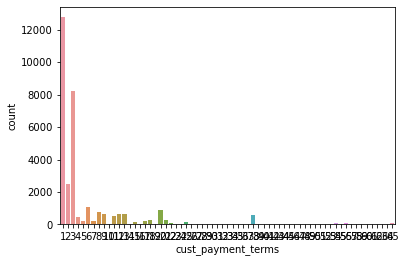

In [ ]:
sns.countplot(x='cust_payment_terms',data=df)

<AxesSubplot:xlabel='business_code', ylabel='count'>

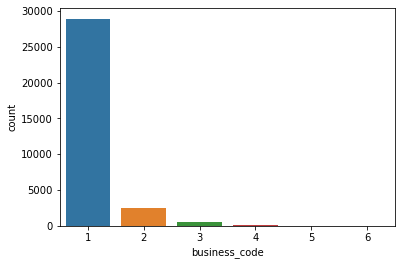

In [ ]:
sns.countplot(x='business_code',data=df)

<AxesSubplot:xlabel='cust_number', ylabel='count'>

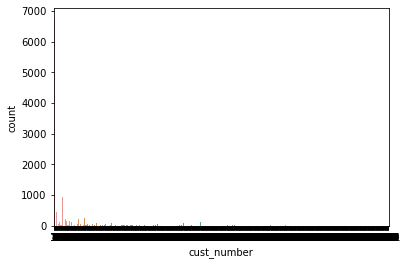

In [ ]:
sns.countplot(x='cust_number',data=df)

<AxesSubplot:xlabel='cust_payment_terms', ylabel='count'>

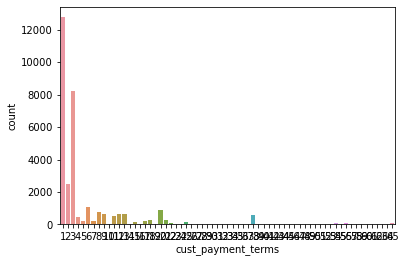

In [ ]:
sns.countplot(x='cust_payment_terms',data=df)

<AxesSubplot:xlabel='invoice_currency', ylabel='count'>

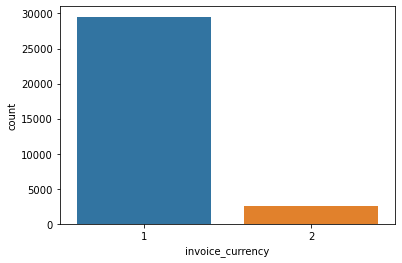

In [ ]:
sns.countplot(x='invoice_currency',data=df)

In [ ]:
corr=df.corr().abs()

In [ ]:
u=corr_matrix.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))

In [ ]:
print([column for column in u.columns if any(u[column] ==1)])

['invoice_id']


In [ ]:
for i in df.columns:
    print(i)
    print(df[i].describe())
    print()

business_code
count    32074.000000
mean         1.121282
std          0.401809
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          6.000000
Name: business_code, dtype: float64

cust_number
count    32074.000000
mean       146.603355
std        226.818710
min          1.000000
25%          5.000000
50%         46.000000
75%        166.000000
max       1301.000000
Name: cust_number, dtype: float64

name_customer
count    32074.000000
mean       601.532706
std        789.472552
min          1.000000
25%         43.000000
50%        281.000000
75%        824.000000
max       3684.000000
Name: name_customer, dtype: float64

doc_id
count    3.207400e+04
mean     2.012401e+09
std      2.786638e+08
min      1.928500e+09
25%      1.929005e+09
50%      1.929431e+09
75%      1.929770e+09
max      2.960585e+09
Name: doc_id, dtype: float64

posting_date
count                   32074
unique                    283
top       2019-04-03 00:00:00
freq   

<ipython-input-467-11eee38af536>:3: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  print(df[i].describe())
<ipython-input-467-11eee38af536>:3: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  print(df[i].describe())
<ipython-input-467-11eee38af536>:3: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  print(df[i].describe())
<ipython-input-467-11eee38af536>:3: FutureWarning: Treating datetime data

In [ ]:
cov=df.cov().abs()

In [ ]:
ur=corr_matrix.where(np.triu(np.ones(cov.shape), k=1).astype(np.bool))
ur

,business_code,cust_number,name_customer,doc_id,invoice_currency,total_open_amount,cust_payment_terms,invoice_id
business_code,NaN,0.161364,0.255781,0.664259,0.642441,0.104810,0.012390,0.664259
cust_number,NaN,NaN,0.574261,0.083008,0.078482,0.010922,0.081281,0.083008
name_customer,NaN,NaN,NaN,0.152979,0.146294,0.077683,0.060860,0.152979
doc_id,NaN,NaN,NaN,NaN,0.999541,0.185019,0.102375,1.000000
invoice_currency,NaN,NaN,NaN,NaN,NaN,0.185697,0.104255,0.999541
total_open_amount,NaN,NaN,NaN,NaN,NaN,NaN,0.130130,0.185019
cust_payment_terms,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.102375
invoice_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.head(1)

,business_code,cust_number,name_customer,doc_id,posting_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id
1,1,1,1,1.928537e+09,2018-12-30,2018-12-30,2019-01-14,1,48419.67,2018-12-30,1,1.928537e+09


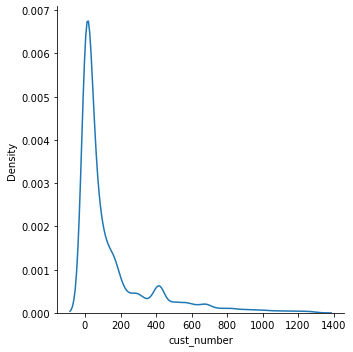

In [ ]:
sns.displot(df, x="cust_number", kind="kde")

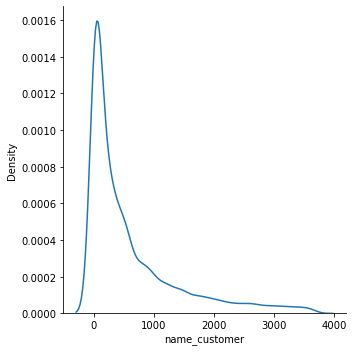

In [ ]:
sns.displot(df, x="name_customer", kind="kde")

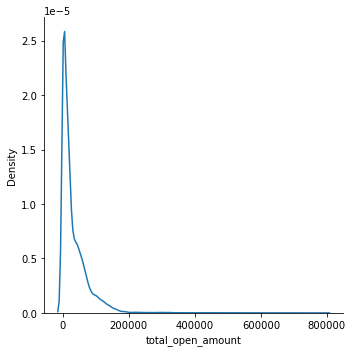

In [ ]:
sns.displot(df, x="total_open_amount", kind="kde")

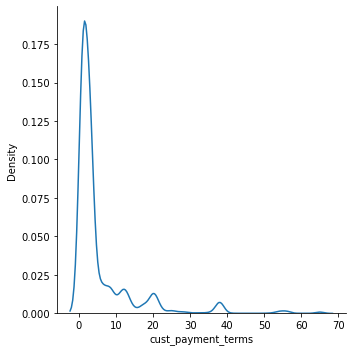

In [ ]:
sns.displot(df, x="cust_payment_terms", kind="kde")

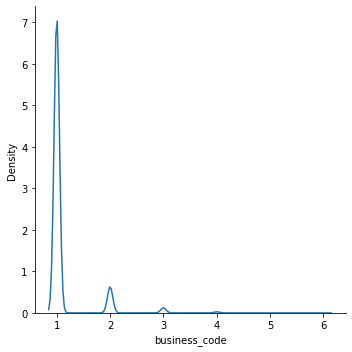

In [ ]:
sns.displot(df, x="business_code", kind="kde")

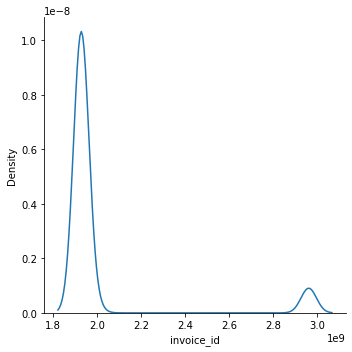

In [ ]:
sns.displot(df, x="invoice_id", kind="kde")

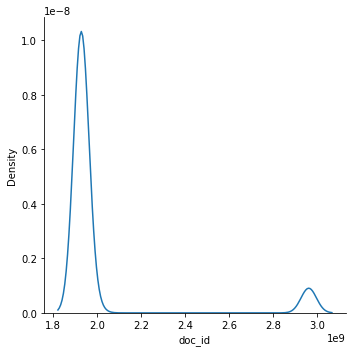

In [ ]:
sns.displot(df, x="doc_id", kind="kde")

In [ ]:
df=df.rename(columns={'document_create_date.1':'document_create_date'})
df_dates=df

df_dates['posting_date_month'],df_dates['posting_date_day'],df_dates['posting_date_year'],df_dates['posting_date_quarter'],df_dates['posting_date_dayofweek'],df_dates['posting_date_week']=df_dates['posting_date'].dt.month,df_dates['posting_date'].dt.day,df_dates['posting_date'].dt.year,df_dates['posting_date'].dt.quarter,df_dates['posting_date'].dt.dayofweek,df_dates['posting_date'].dt.isocalendar().week.astype(int)

df_dates['due_in_date_month'],df_dates['due_in_date_day'],df_dates['due_in_date_year'],df_dates['due_in_date_quarter'],df_dates['due_in_date_dayofweek'],df_dates['due_in_date_week']=df_dates['due_in_date'].dt.month,df_dates['due_in_date'].dt.day,df_dates['due_in_date'].dt.year,df_dates['due_in_date'].dt.quarter,df_dates['due_in_date'].dt.dayofweek,df_dates['due_in_date'].dt.isocalendar().week.astype(int)

df_dates['document_create_date_month'],df_dates['document_create_date_day'],df_dates['document_create_date_year'],df_dates['document_create_date_quarter'],df_dates['document_create_date_dayofweek'],df_dates['document_create_date_week']=df_dates['document_create_date'].dt.month,df_dates['document_create_date'].dt.day,df_dates['document_create_date'].dt.year,df_dates['document_create_date'].dt.quarter,df_dates['document_create_date'].dt.dayofweek,df_dates['document_create_date'].dt.isocalendar().week.astype(int)

df_dates['baseline_create_date_month'],df_dates['baseline_create_date_day'],df_dates['baseline_create_date_year'],df_dates['baseline_create_date_quarter'],df_dates['baseline_create_date_dayofweek'],df_dates['baseline_create_date_week']=df_dates['baseline_create_date'].dt.month,df_dates['baseline_create_date'].dt.day,df_dates['baseline_create_date'].dt.year,df_dates['baseline_create_date'].dt.quarter,df_dates['baseline_create_date'].dt.dayofweek,df_dates['baseline_create_date'].dt.isocalendar().week.astype(int)

df=df.drop(['posting_date','document_create_date','due_in_date','baseline_create_date'],axis=1)

In [ ]:
df.dtypes

business_code                       int64
cust_number                         int64
name_customer                       int64
doc_id                            float64
invoice_currency                    int64
total_open_amount                 float64
cust_payment_terms                  int64
invoice_id                        float64
posting_date_month                  int64
posting_date_day                    int64
posting_date_year                   int64
posting_date_quarter                int64
posting_date_dayofweek              int64
posting_date_week                   int32
due_in_date_month                   int64
due_in_date_day                     int64
due_in_date_year                    int64
due_in_date_quarter                 int64
due_in_date_dayofweek               int64
due_in_date_week                    int32
document_create_date_month          int64
document_create_date_day            int64
document_create_date_year           int64
document_create_date_quarter      

In [ ]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
reg = LinearRegression(normalize=True)
reg.fit(df, y_train)
#print(val_train)

LinearRegression(normalize=True)

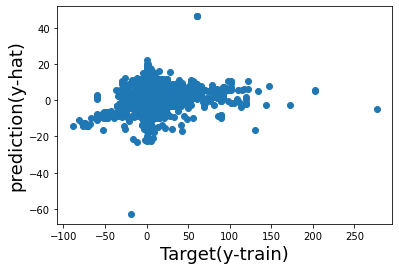

In [ ]:
y_hat=reg.predict(df)
plt.scatter(y_train,y_hat)
plt.xlabel('Target(y-train)',size=18)
plt.ylabel('prediction(y-hat)',size=18)
plt.show()

In [ ]:
MSE_Score = []
R2_Score = []
Algorithm = []

In [ ]:
Algorithm.append('Linear Regression')
clf = LinearRegression()
clf.fit(df, y_train)


predicted = clf.predict(df)

In [ ]:
mean_squared_error(y_train, predicted)

118.7214409414113

In [ ]:
r2_score(y_train, predicted)

0.07399478879729704

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_train, predicted)

5.078769919439073

In [ ]:
clf1 = RandomForestRegressor()
clf1.fit(df, y_train)

# Predicting the Test Set Results
predicted = clf1.predict(df)

In [ ]:
mean_squared_error(y_train, predicted)

10.283701770904782

In [ ]:
r2_score(y_train, predicted)

0.9197890342738364

In [ ]:
mean_absolute_error(y_train, predicted)

1.185211074390472

In [ ]:
df_obj=x_val

In [ ]:
df_obj.loc[:, 'code_invoice_currency'] = df_obj.loc[:, 'invoice_currency'].map(code_invoice_currency)
df_obj.loc[:, 'code_business_code'] = df_obj.loc[:, 'business_code'].map(code_business_code)
df_obj.loc[:, 'code_cust_payment_terms'] = df_obj.loc[:, 'cust_payment_terms'].map(code_cust_payment_terms)
df_obj.loc[:, 'code_cust_number'] = df_obj.loc[:, 'cust_number'].map(code_cust_number)
df_obj.loc[:, 'code_name_customer'] = df_obj.loc[:, 'name_customer'].map(code_name_customer)
df=df_obj
df['name_customer'],df['cust_number'],df['cust_payment_terms'],df['business_code'],df['invoice_currency']=df_obj.loc[:, 'code_name_customer'],df_obj.loc[:, 'code_cust_number'],df_obj.loc[:, 'code_cust_payment_terms'],df_obj.loc[:, 'code_business_code'],df_obj.loc[:, 'code_invoice_currency']

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1675: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
<ipython-input-491-0ee7f643d914>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

In [ ]:
df_obj

,business_code,cust_number,name_customer,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,code_invoice_currency,code_business_code,code_cust_payment_terms,code_cust_number,code_name_customer
32188,2,235.0,1285.0,2019,2.960585e+09,2019-10-08,2019-10-08,2019-10-20,2,RV,3581.88,2019-10-10,2.0,2.960585e+09,2,2,2.0,235.0,1285.0
32189,1,28.0,420.0,2019,1.929988e+09,2019-10-08,2019-10-08,2019-10-23,1,RV,37218.86,2019-10-08,1.0,1.929988e+09,1,1,1.0,28.0,420.0
32190,1,4.0,63.0,2019,1.929983e+09,2019-10-08,2019-10-08,2019-10-23,1,RV,6899.02,2019-10-08,3.0,1.929983e+09,1,1,3.0,4.0,63.0
32191,1,473.0,2957.0,2019,1.929990e+09,2019-10-08,2019-10-08,2019-11-22,1,RV,14655.60,2019-10-08,32.0,1.929990e+09,1,1,32.0,473.0,2957.0
32192,1,79.0,484.0,2019,1.929957e+09,2019-10-08,2019-10-08,2019-10-23,1,RV,2392.26,2019-10-08,1.0,1.929957e+09,1,1,1.0,79.0,484.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39057,2,2.0,784.0,2019,2.960597e+09,2019-12-09,2019-12-09,2019-12-20,2,RV,98675.51,2019-12-10,2.0,2.960597e+09,2,2,2.0,2.0,784.0
39058,1,4.0,5.0,2019,1.930250e+09,2019-12-09,2019-12-09,2019-12-24,1,RV,33219.81,2019-12-09,3.0,1.930250e+09,1,1,3.0,4.0,5.0
39059,1,4.0,19.0,2019,1.930255e+09,2019-12-09,2019-12-09,2019-12-24,1,RV,24470.38,2019-12-09,3.0,1.930255e+09,1,1,3.0,4.0,19.0
39060,1,7.0,82.0,2019,1.930254e+09,2019-12-09,2019-12-09,2019-12-24,1,RV,58016.56,2019-12-09,3.0,1.930254e+09,1,1,3.0,7.0,82.0


In [ ]:
df=df.rename(columns={'document_create_date.1':'document_create_date'})
df_dates=df
df_dates['posting_date_month'],df_dates['posting_date_day'],df_dates['posting_date_year'],df_dates['posting_date_quarter'],df_dates['posting_date_dayofweek'],df_dates['posting_date_week']=df_dates['posting_date'].dt.month,df_dates['posting_date'].dt.day,df_dates['posting_date'].dt.year,df_dates['posting_date'].dt.quarter,df_dates['posting_date'].dt.dayofweek,df_dates['posting_date'].dt.isocalendar().week.astype(int)
df_dates['due_in_date_month'],df_dates['due_in_date_day'],df_dates['due_in_date_year'],df_dates['due_in_date_quarter'],df_dates['due_in_date_dayofweek'],df_dates['due_in_date_week']=df_dates['due_in_date'].dt.month,df_dates['due_in_date'].dt.day,df_dates['due_in_date'].dt.year,df_dates['due_in_date'].dt.quarter,df_dates['due_in_date'].dt.dayofweek,df_dates['due_in_date'].dt.isocalendar().week.astype(int)
df_dates['document_create_date_month'],df_dates['document_create_date_day'],df_dates['document_create_date_year'],df_dates['document_create_date_quarter'],df_dates['document_create_date_dayofweek'],df_dates['document_create_date_week']=df_dates['document_create_date'].dt.month,df_dates['document_create_date'].dt.day,df_dates['document_create_date'].dt.year,df_dates['document_create_date'].dt.quarter,df_dates['document_create_date'].dt.dayofweek,df_dates['document_create_date'].dt.isocalendar().week.astype(int)
df_dates['baseline_create_date_month'],df_dates['baseline_create_date_day'],df_dates['baseline_create_date_year'],df_dates['baseline_create_date_quarter'],df_dates['baseline_create_date_dayofweek'],df_dates['baseline_create_date_week']=df_dates['baseline_create_date'].dt.month,df_dates['baseline_create_date'].dt.day,df_dates['baseline_create_date'].dt.year,df_dates['baseline_create_date'].dt.quarter,df_dates['baseline_create_date'].dt.dayofweek,df_dates['baseline_create_date'].dt.isocalendar().week.astype(int)
df=df.drop(['posting_date','document_create_date','due_in_date','baseline_create_date'],axis=1)

In [ ]:
for i in df.columns:
    print(df[i].isna().value_counts())
#predicted = clf.predict(df)

False    6873
Name: business_code, dtype: int64
False    6813
True       60
Name: cust_number, dtype: int64
False    6580
True      293
Name: name_customer, dtype: int64
False    6873
Name: buisness_year, dtype: int64
False    6873
Name: doc_id, dtype: int64
False    6873
Name: invoice_currency, dtype: int64
False    6873
Name: total_open_amount, dtype: int64
False    6867
True        6
Name: cust_payment_terms, dtype: int64
False    6873
Name: invoice_id, dtype: int64
False    6873
Name: code_invoice_currency, dtype: int64
False    6873
Name: code_business_code, dtype: int64
False    6867
True        6
Name: code_cust_payment_terms, dtype: int64
False    6813
True       60
Name: code_cust_number, dtype: int64
False    6580
True      293
Name: code_name_customer, dtype: int64
False    6873
Name: posting_date_month, dtype: int64
False    6873
Name: posting_date_day, dtype: int64
False    6873
Name: posting_date_year, dtype: int64
False    6873
Name: posting_date_quarter, dtype: int64
Fa